In [3]:
import matplotlib.pyplot as plt
import pandas as pd
merged_df_cleaned = pd.read_csv("C:/T/data/지하철/Y/광진구_지하철.csv")
# 역명 매핑 사전 생성
station_name_mapping = {
    "중곡": "Junggok",
    "군자(능동)": "Gunja",
    "어린이대공원(세종대)": "Children_Park",
    "건대입구": "Konkuk",
    "뚝섬유원지": "Ddukssum",
    "광나루(장신대)": "Gwangnaru",
    "아차산(어린이대공원후문)": "Acha",
    "구의(광진구청)": "Gui",
    "강변(동서울터미널)": "Gangbyeon",
    "자양(뚝섬한강공원)": "Jayang"
}

# 역명 변경
merged_df_cleaned['역명'] = merged_df_cleaned['역명'].replace(station_name_mapping)


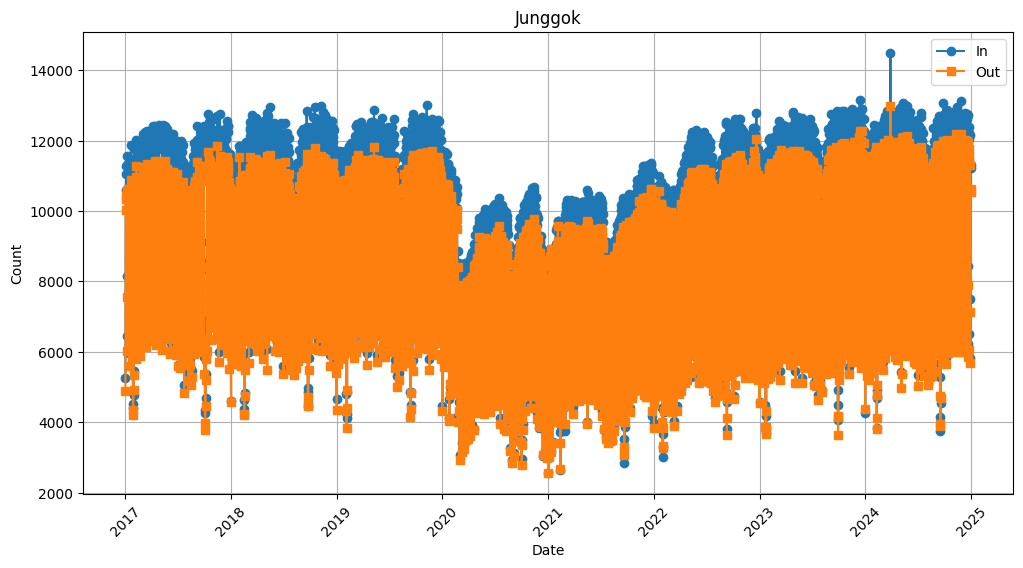

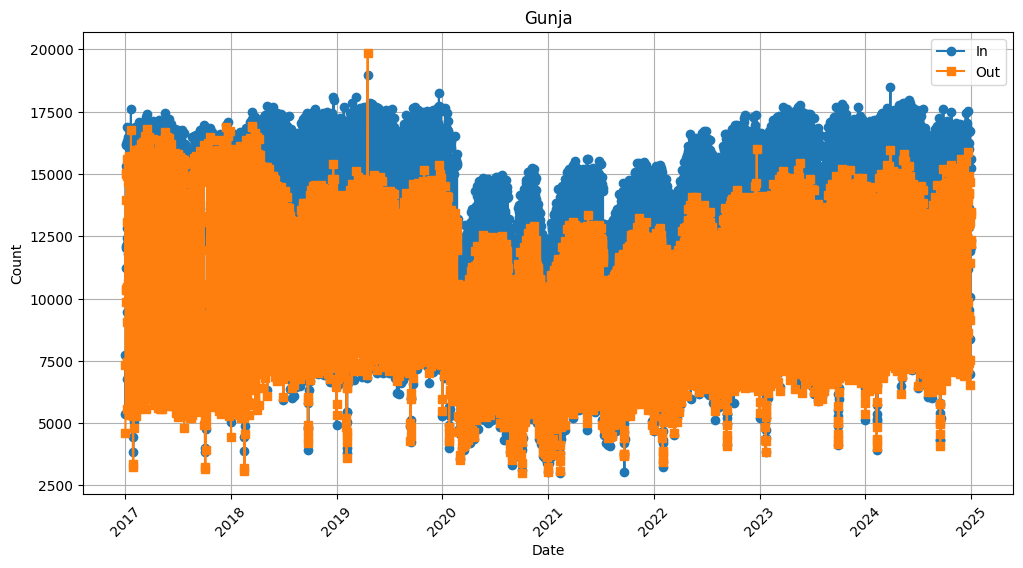

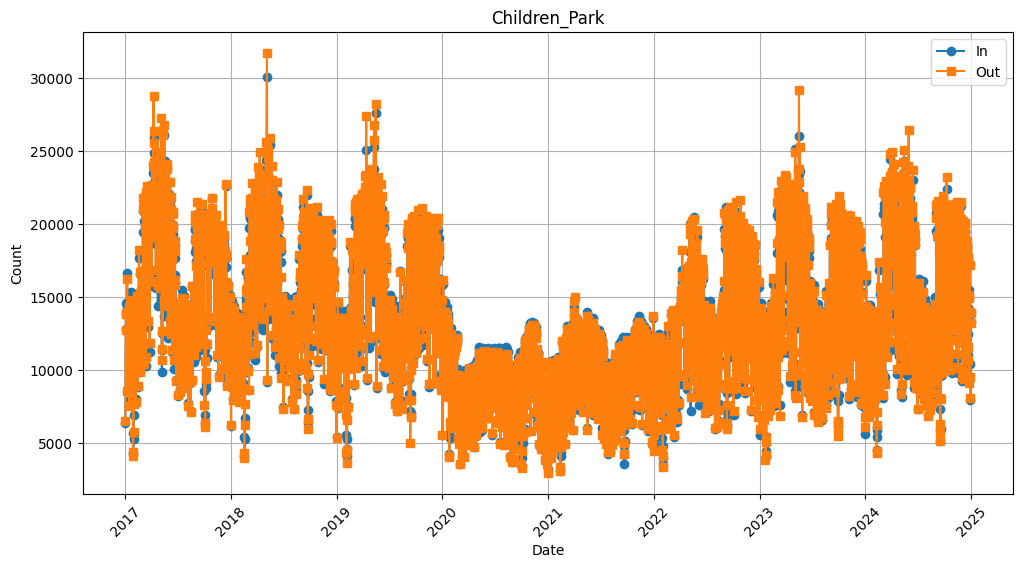

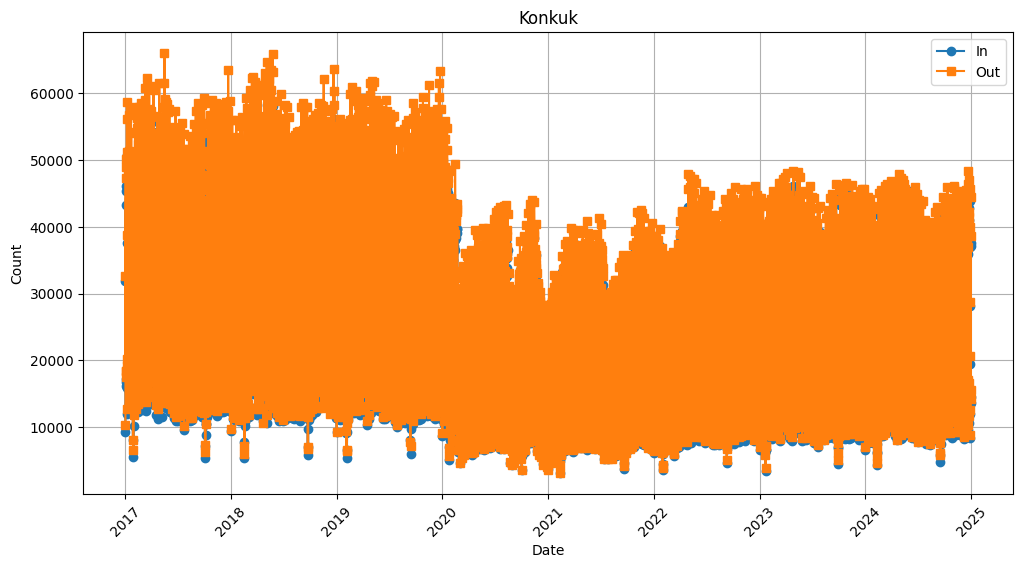

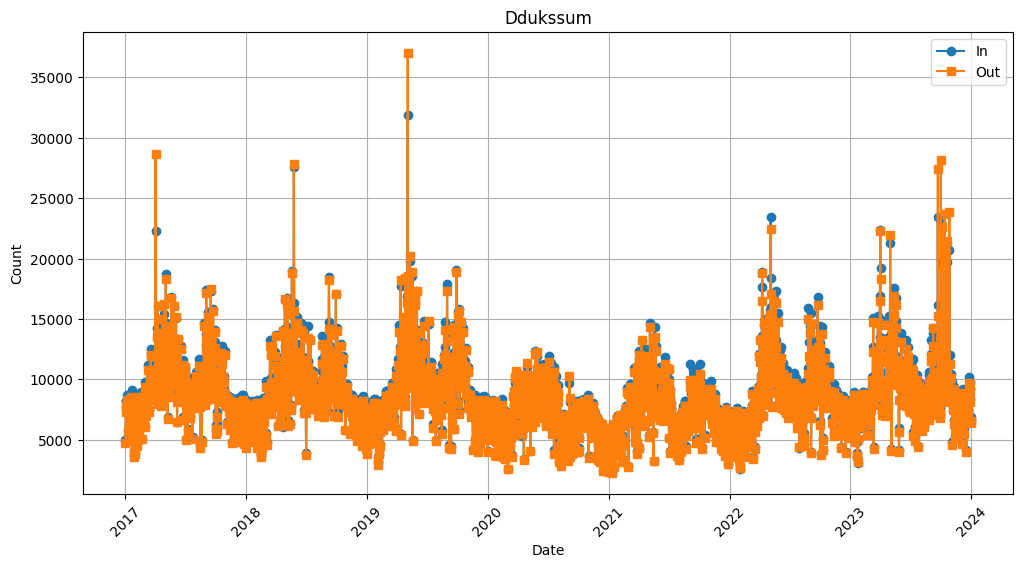

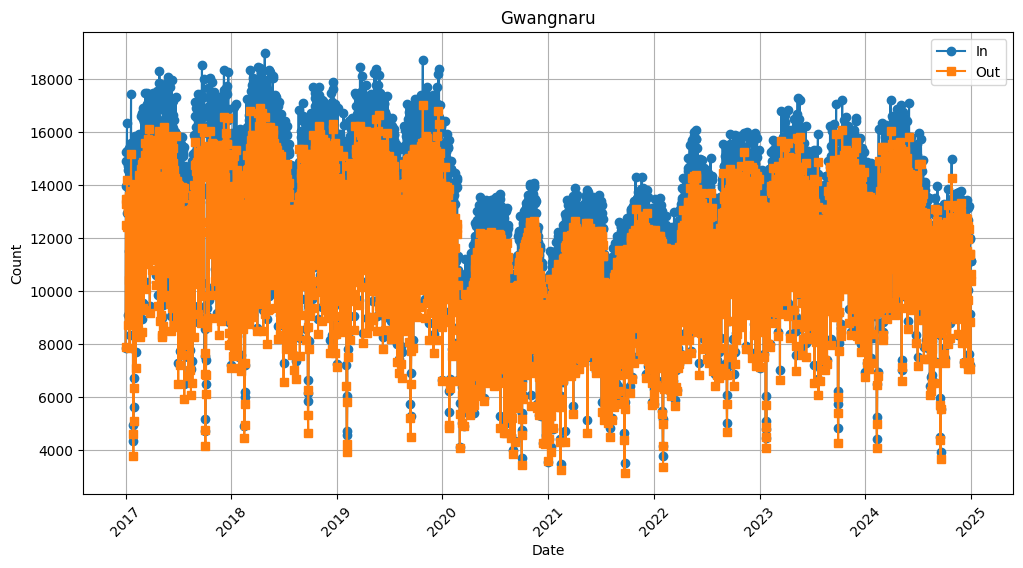

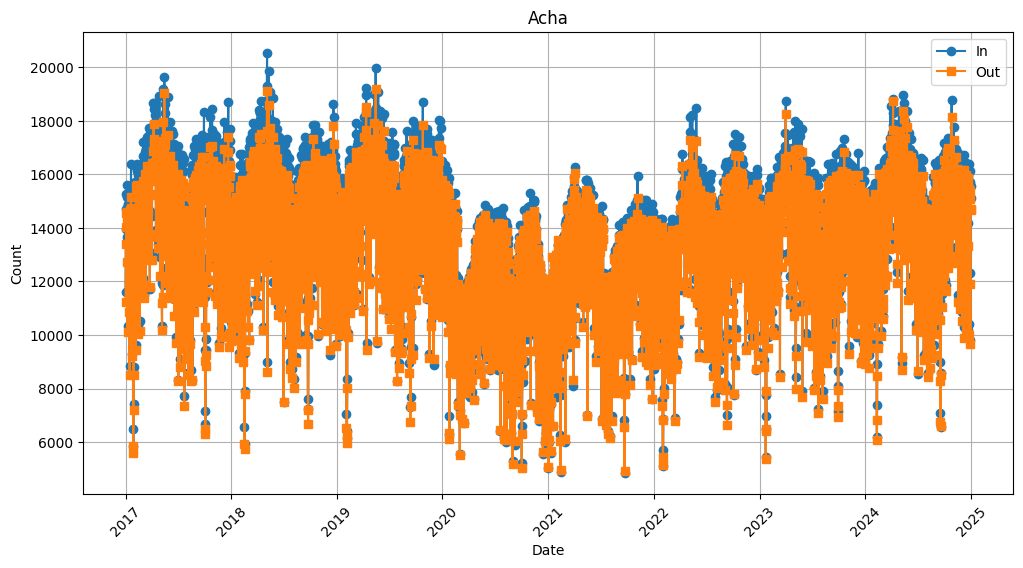

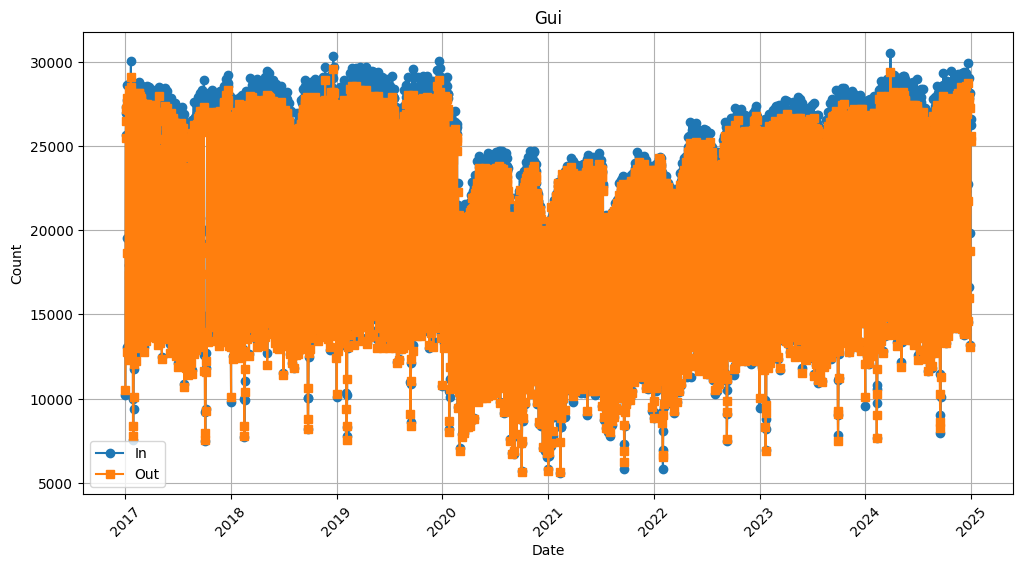

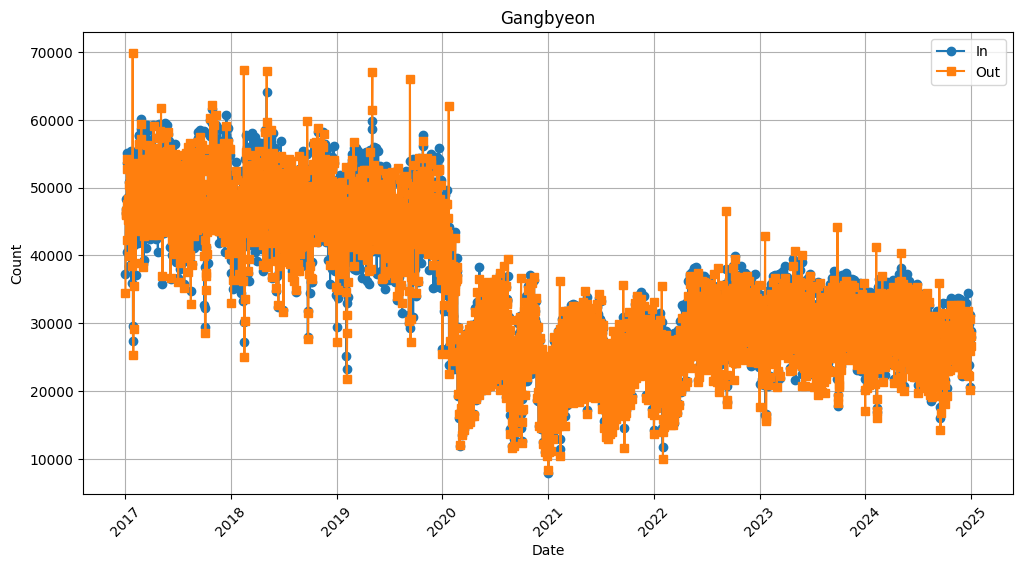

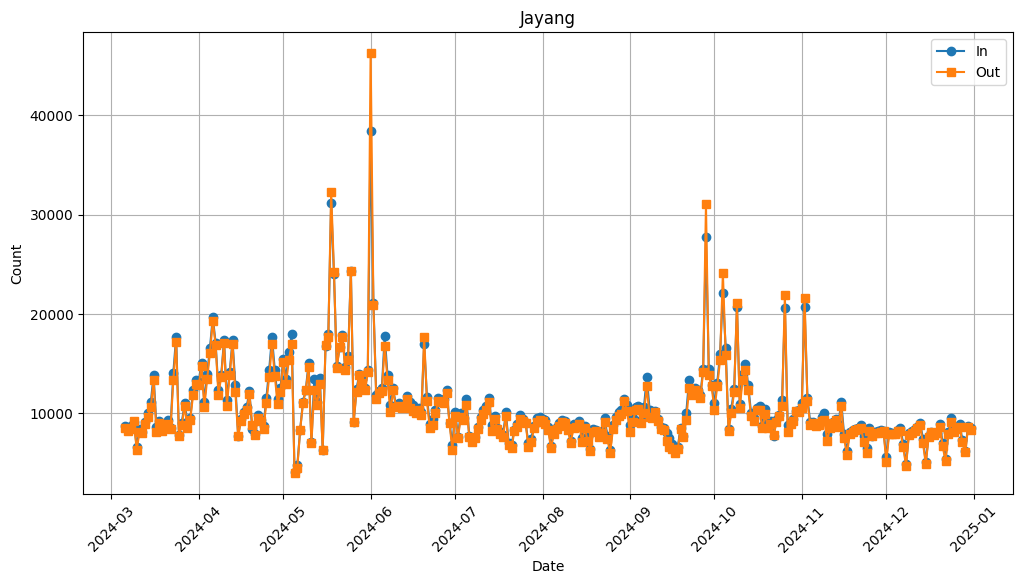

In [11]:
# 모든 역에 대해 승하차 승객 수 그래프 그리기
all_stations = merged_df_cleaned['역명'].unique()

for station in all_stations:
    station_data = merged_df_cleaned[merged_df_cleaned['역명'] == station].sort_values('사용일자')
    
    plt.figure(figsize=(12, 6))
    plt.plot(station_data['사용일자'], station_data['승차총승객수'], label='In', marker='o')
    plt.plot(station_data['사용일자'], station_data['하차총승객수'], label='Out', marker='s')
    
    plt.title(f"{station}")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


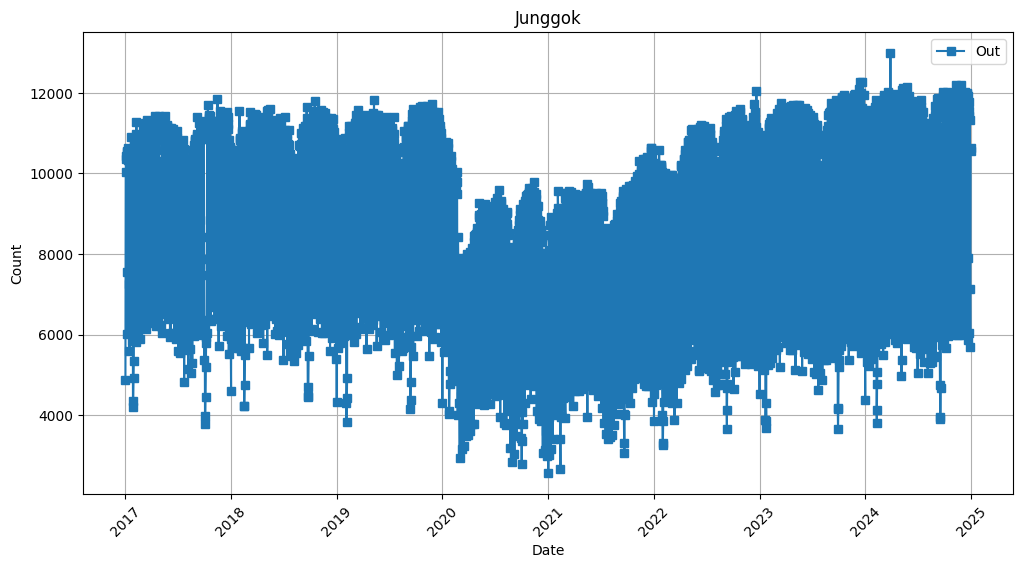

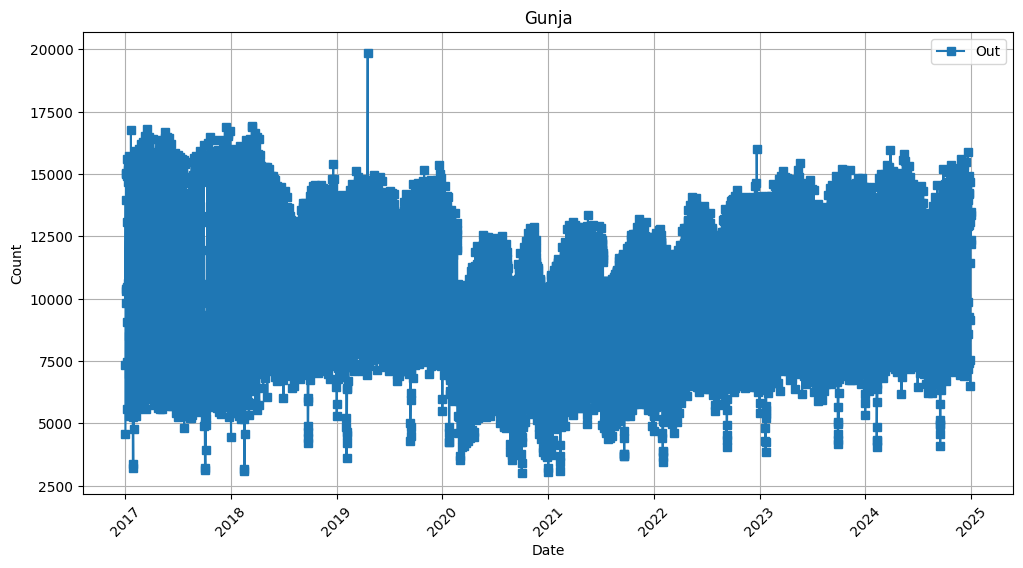

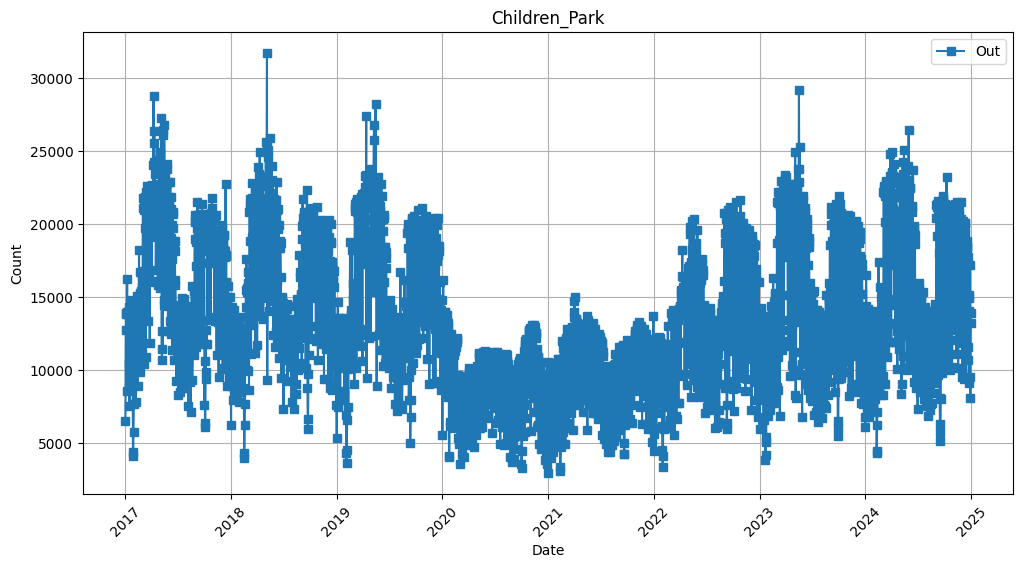

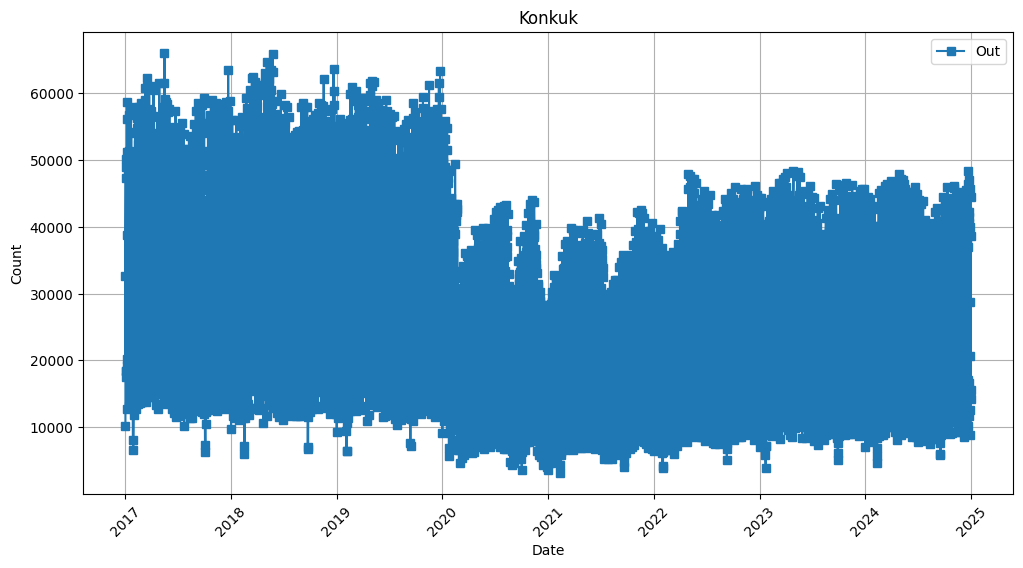

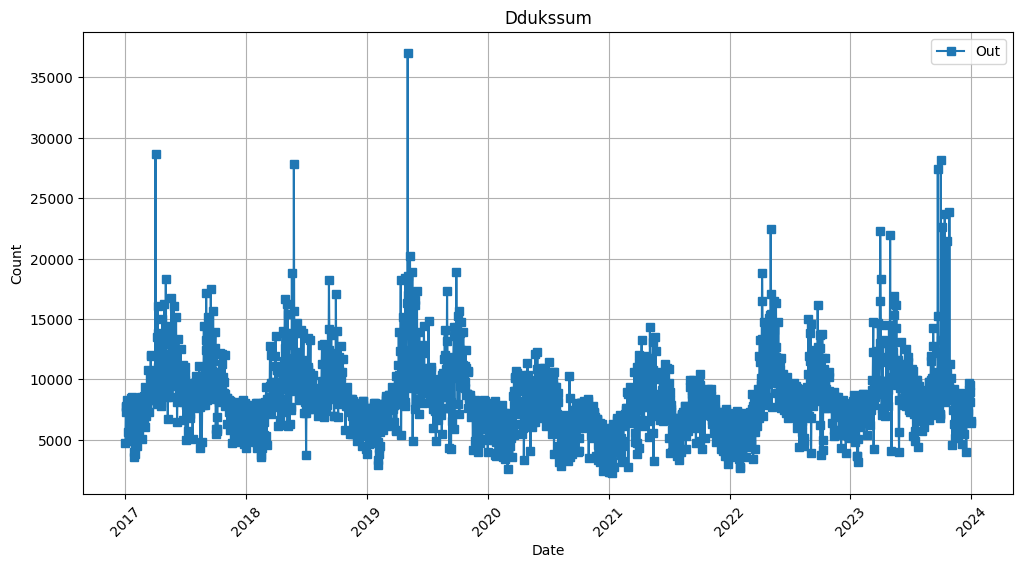

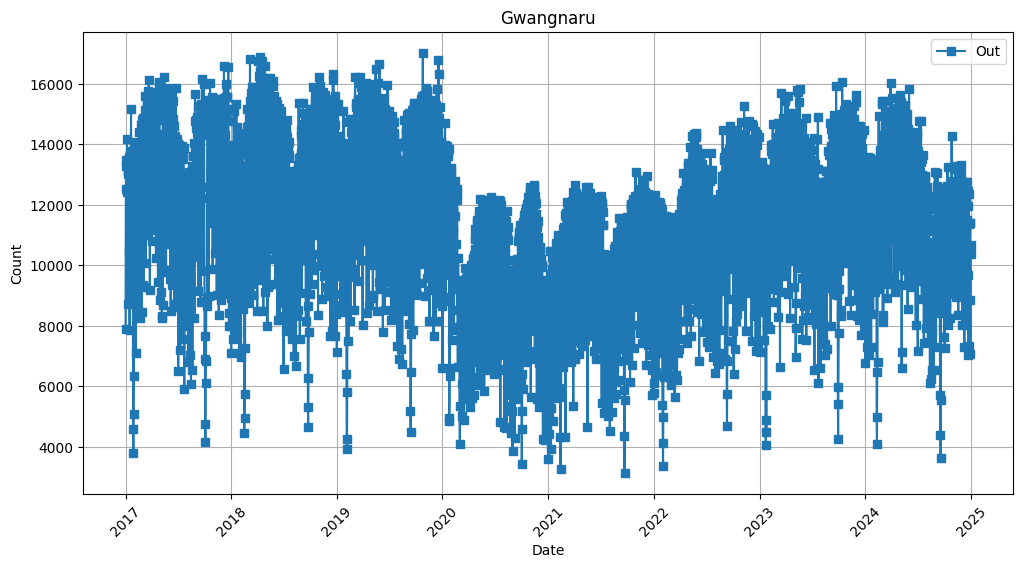

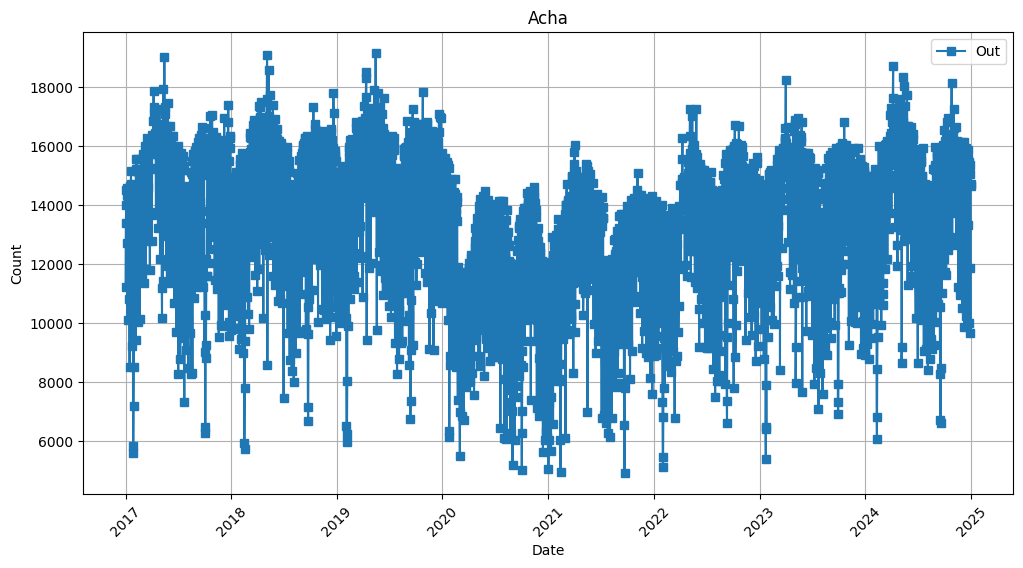

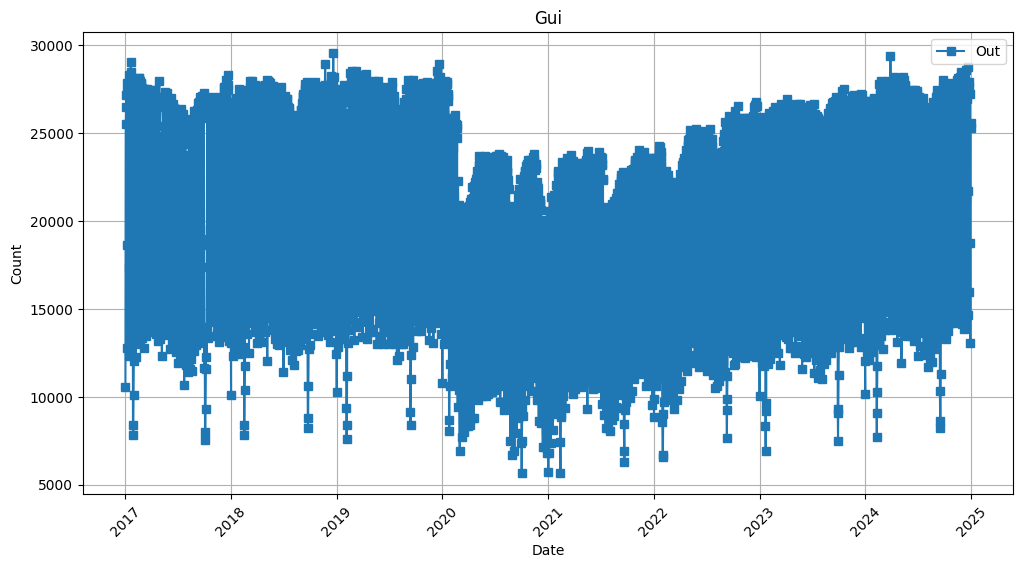

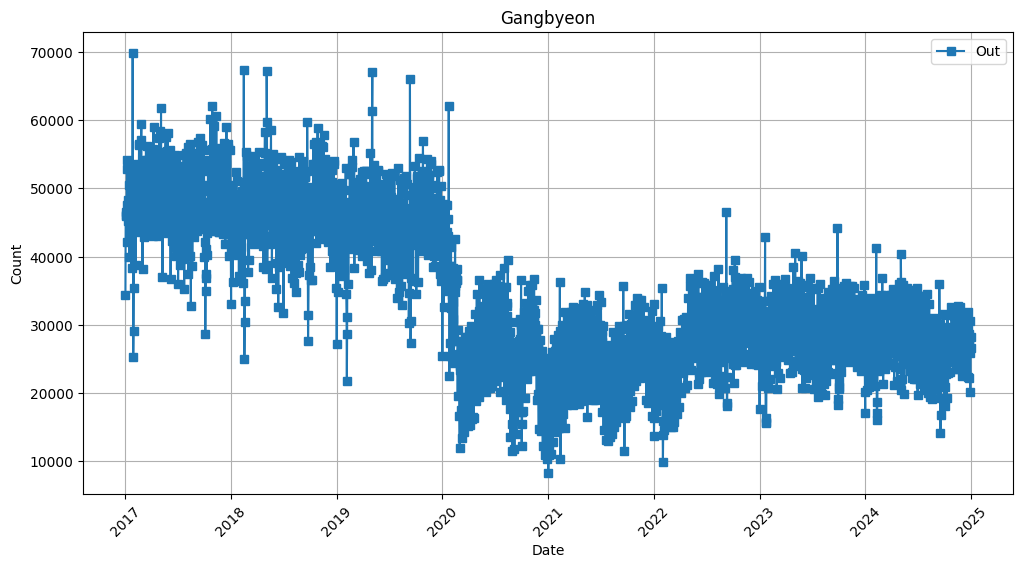

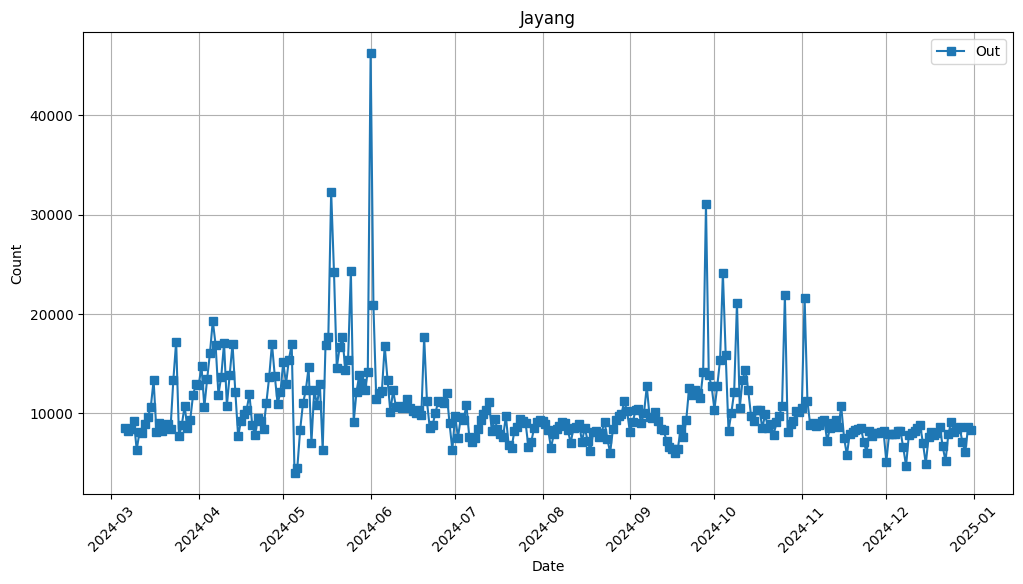

In [12]:
# 모든 역에 대해 승하차 승객 수 그래프 그리기
all_stations = merged_df_cleaned['역명'].unique()

for station in all_stations:
    station_data = merged_df_cleaned[merged_df_cleaned['역명'] == station].sort_values('사용일자')
    
    plt.figure(figsize=(12, 6))
    plt.plot(station_data['사용일자'], station_data['하차총승객수'], label='Out', marker='s')
    
    plt.title(f"{station}")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


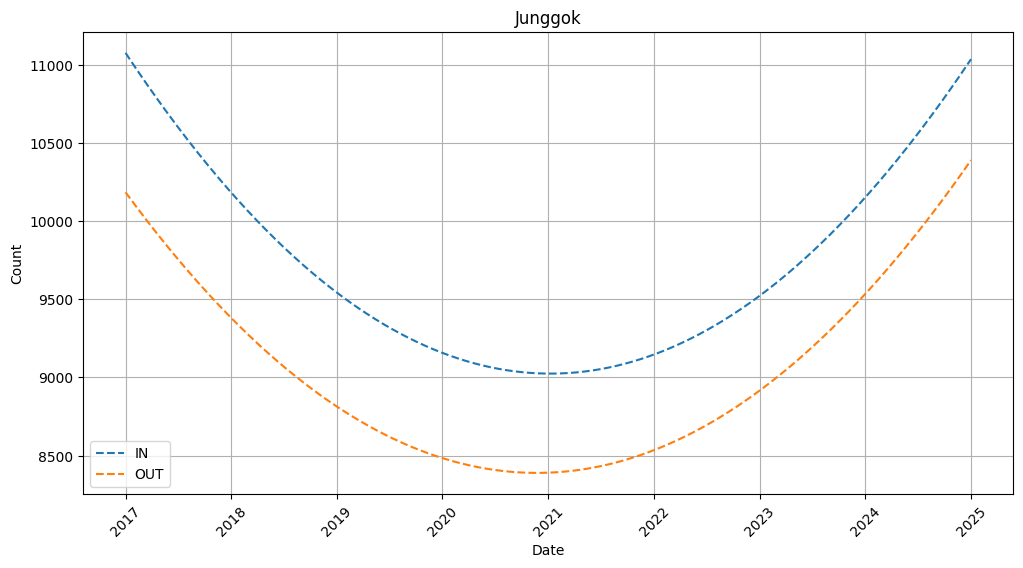

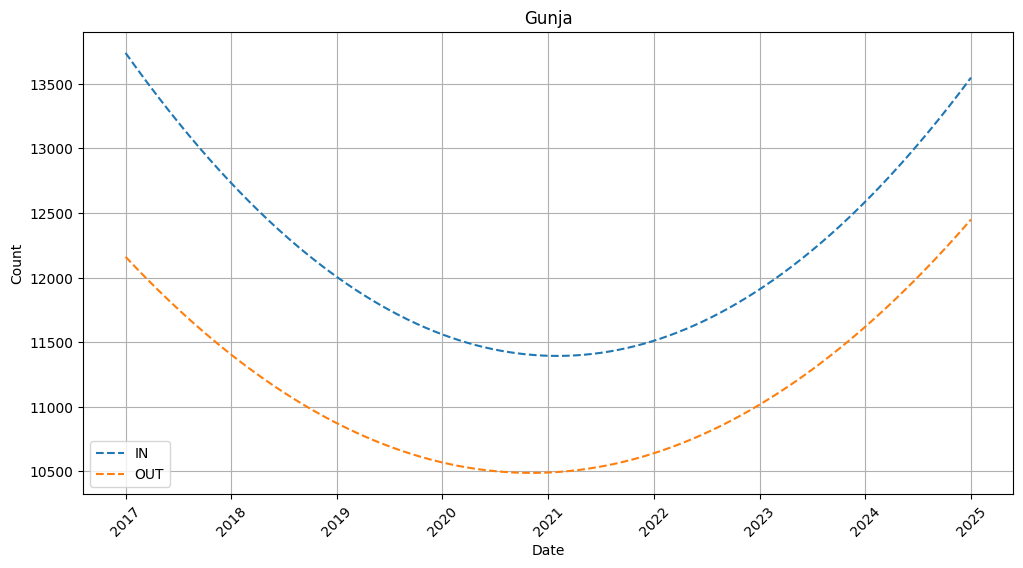

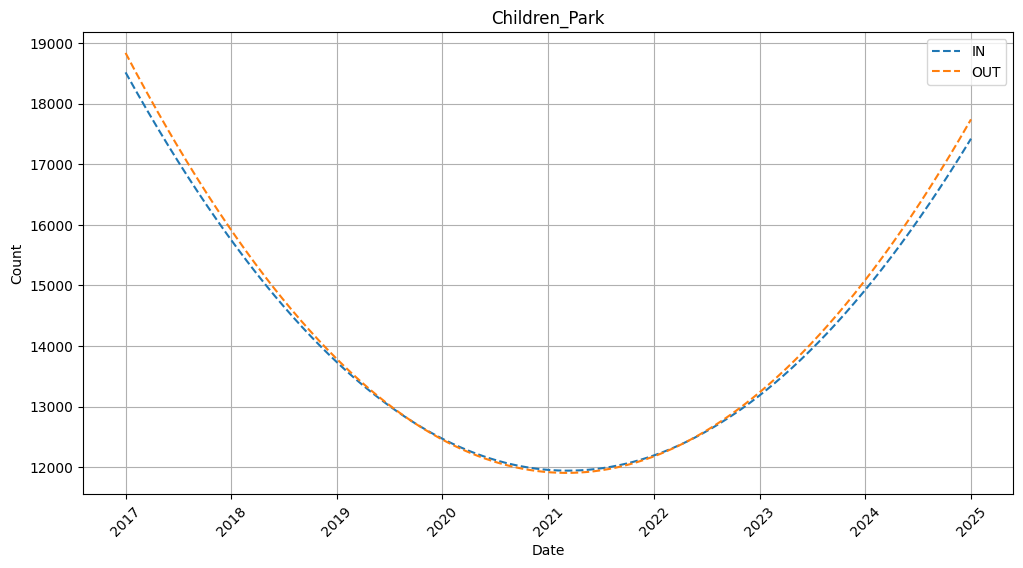

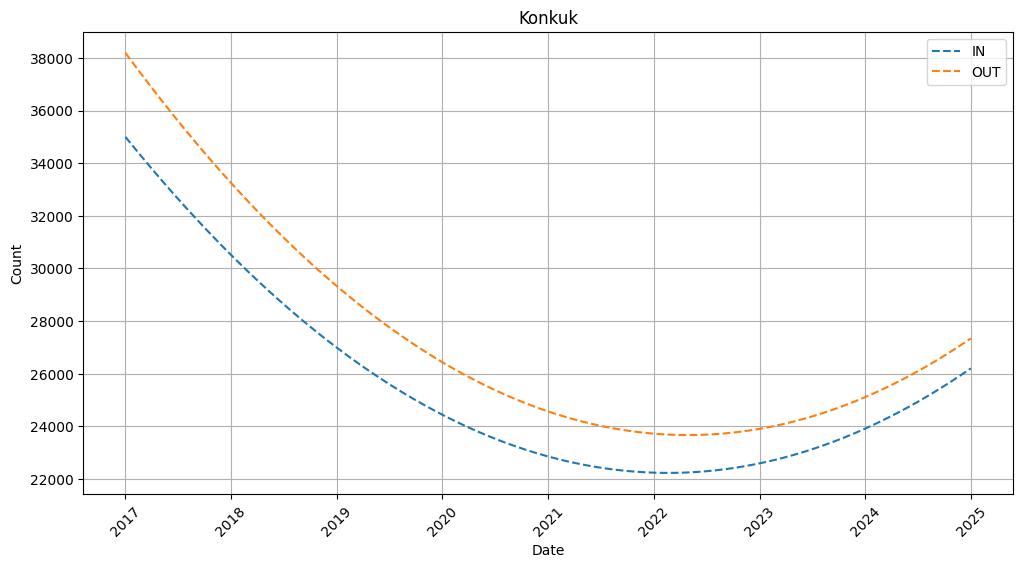

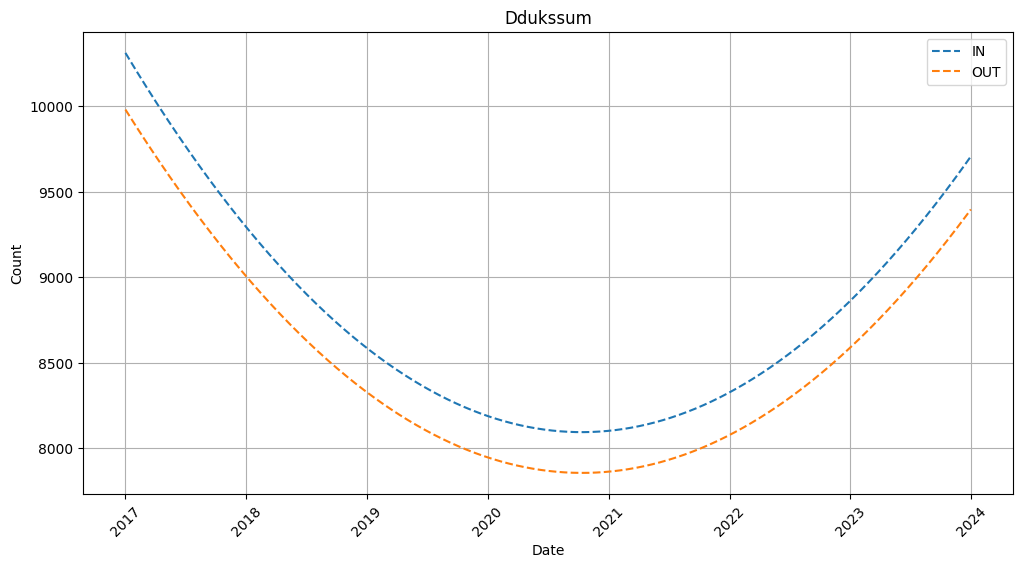

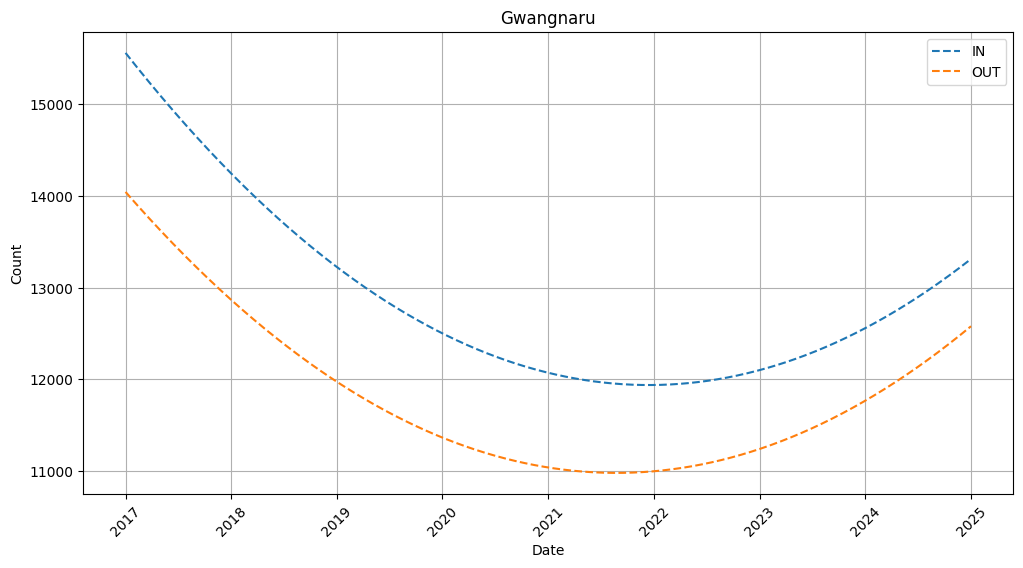

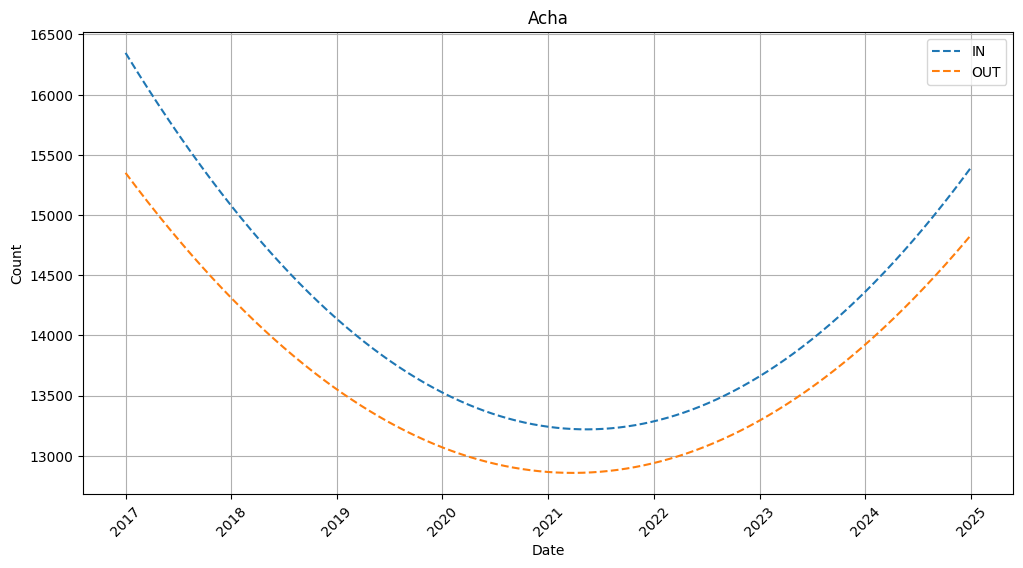

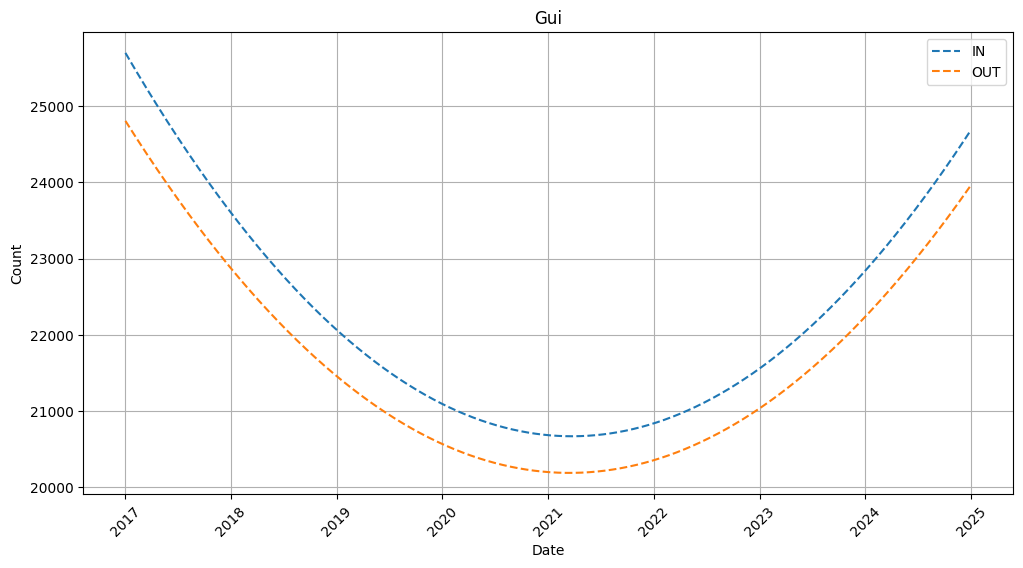

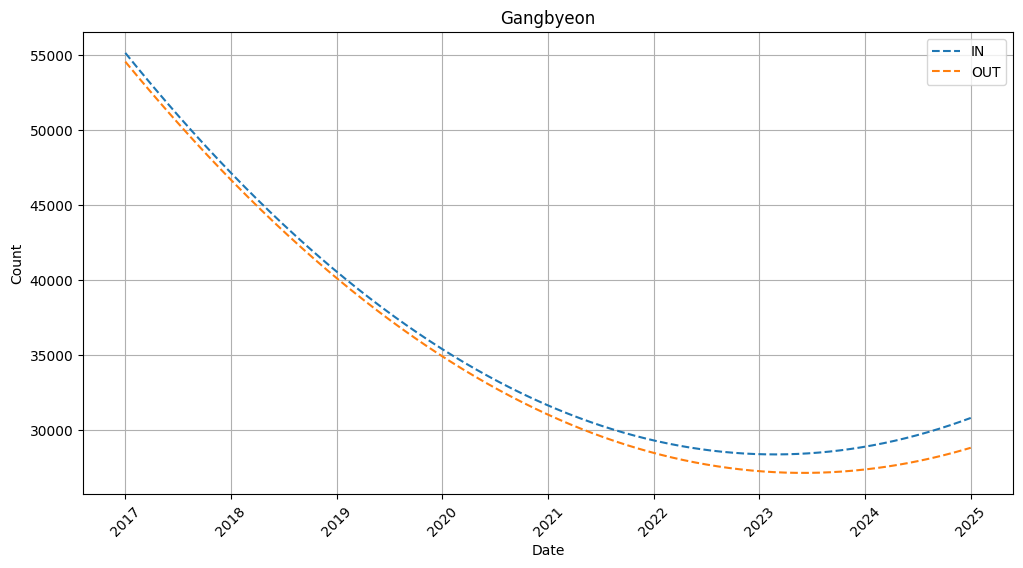

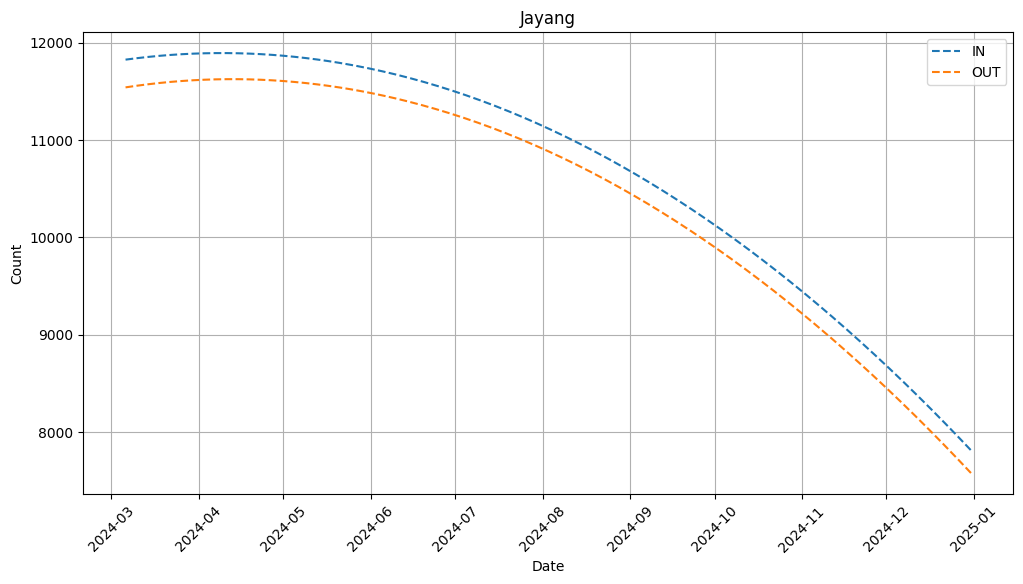

In [9]:
# 모든 역에 대해 추세선 그리기
all_stations = merged_df_cleaned['역명'].unique()

for station in all_stations:
    station_data = merged_df_cleaned[merged_df_cleaned['역명'] == station].sort_values('사용일자')

    # 날짜를 숫자로 변환
    x = (station_data['사용일자'] - station_data['사용일자'].min()).dt.days.values.reshape(-1, 1)

    # 승차총승객수 추세선 계산
    y_boarding = station_data['승차총승객수'].values
    coeffs_boarding = np.polyfit(x.flatten(), y_boarding, 2)  # 2차 다항회귀
    trend_boarding = np.polyval(coeffs_boarding, x)

    # 하차총승객수 추세선 계산
    y_alighting = station_data['하차총승객수'].values
    coeffs_alighting = np.polyfit(x.flatten(), y_alighting, 2)
    trend_alighting = np.polyval(coeffs_alighting, x)

    # 그래프 그리기
    plt.figure(figsize=(12, 6))
    plt.plot(station_data['사용일자'], trend_boarding, label='IN', linestyle='--')
    plt.plot(station_data['사용일자'], trend_alighting, label='OUT', linestyle='--')

    plt.title(f"{station}")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


C:\Users\peter\AppData\Local\Temp\ipykernel_24644\2950689470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['월'] = filtered_data['사용일자'].dt.to_period('M')


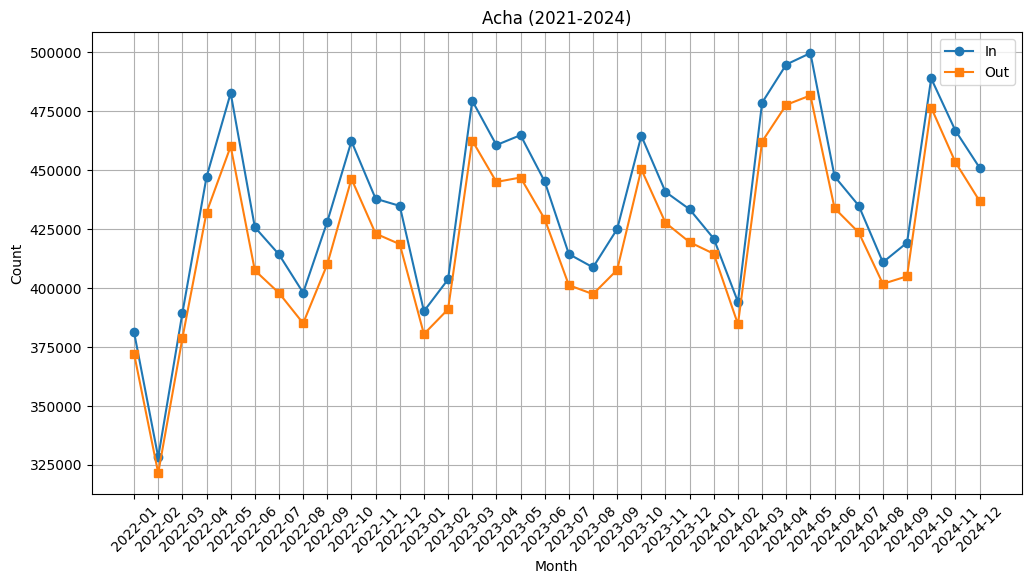

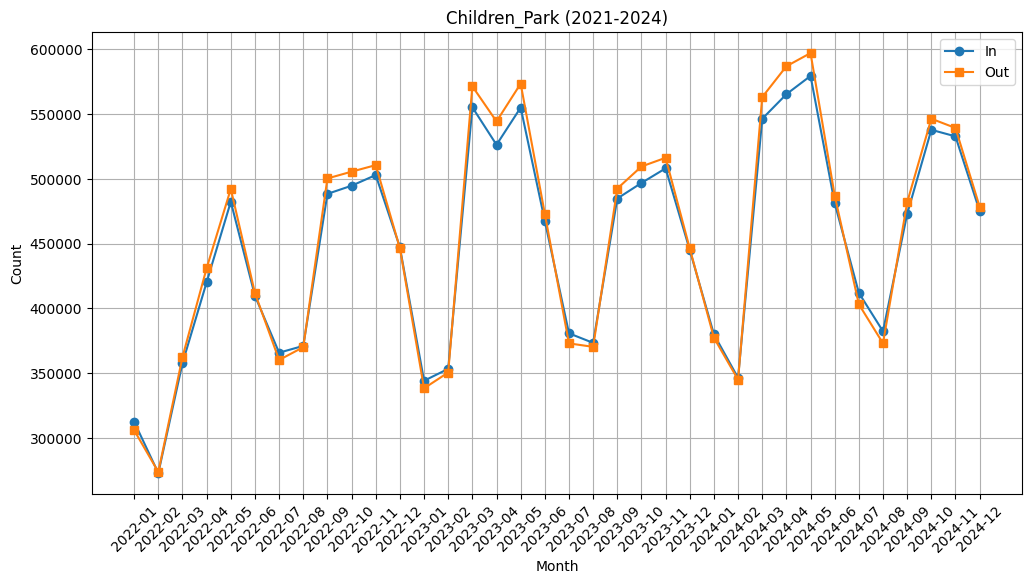

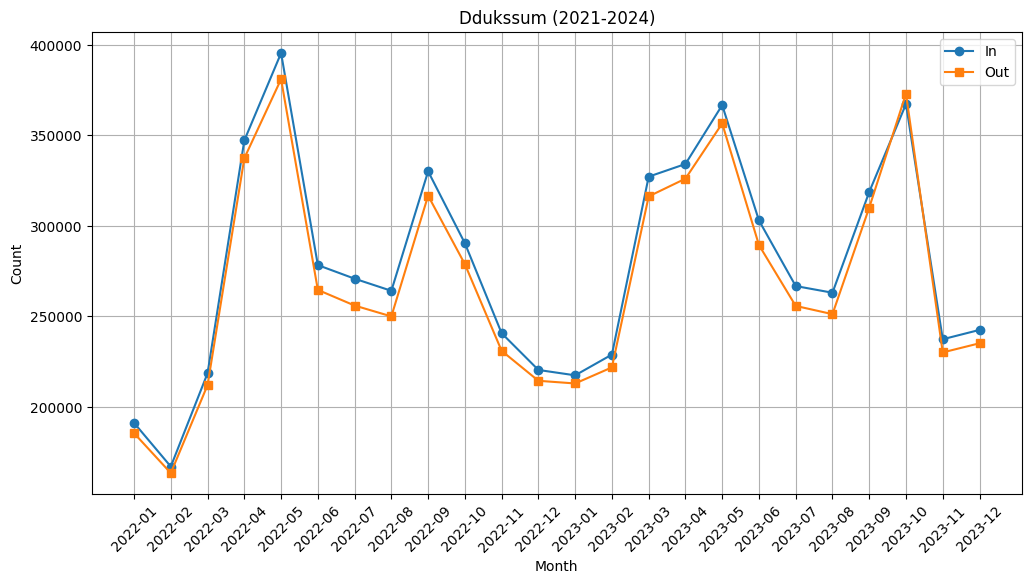

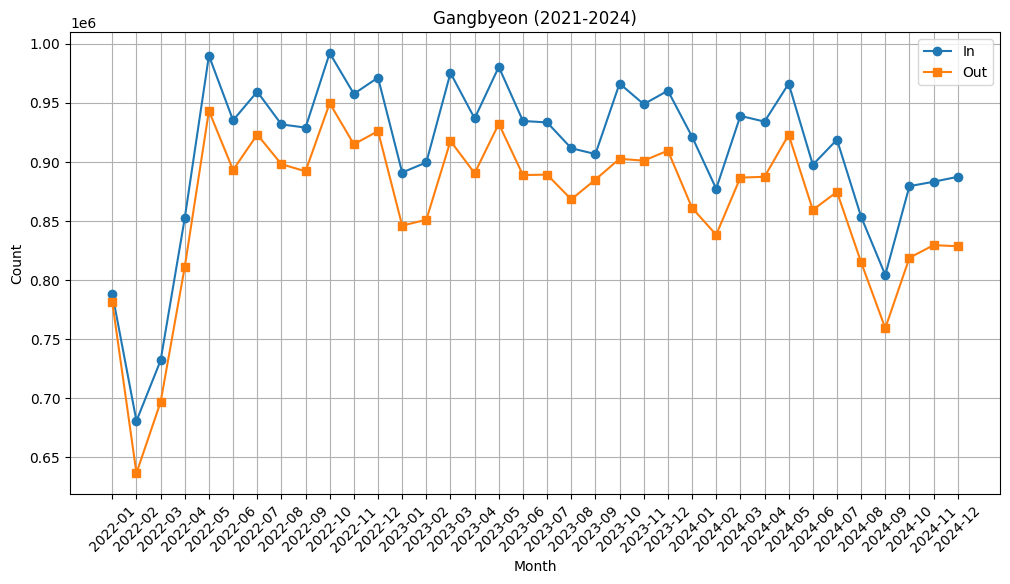

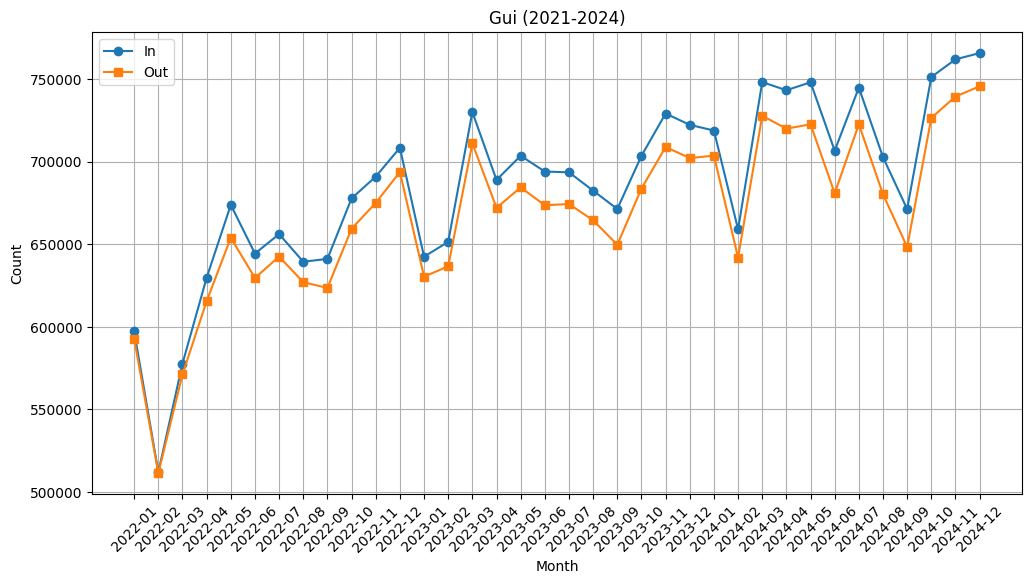

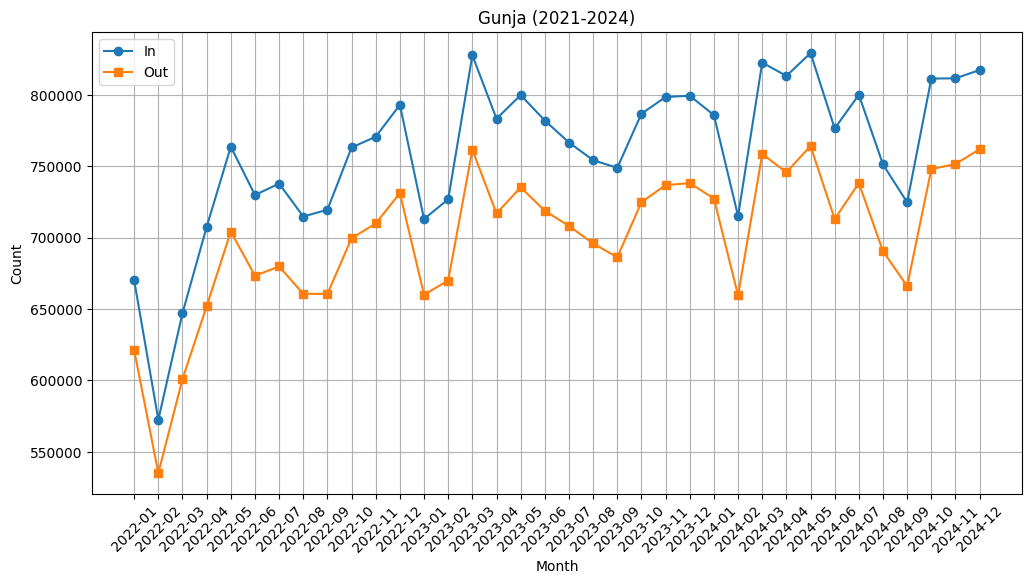

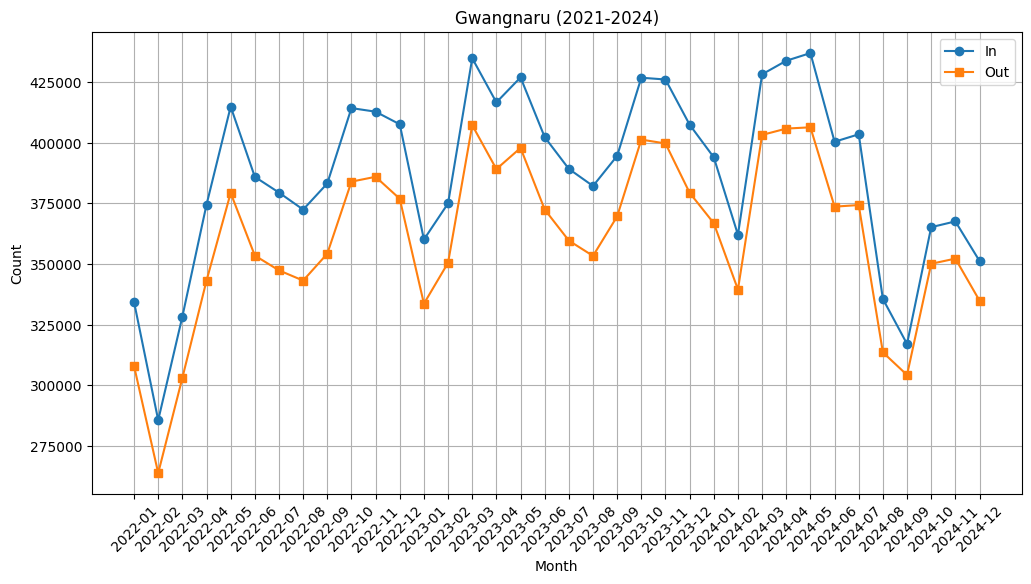

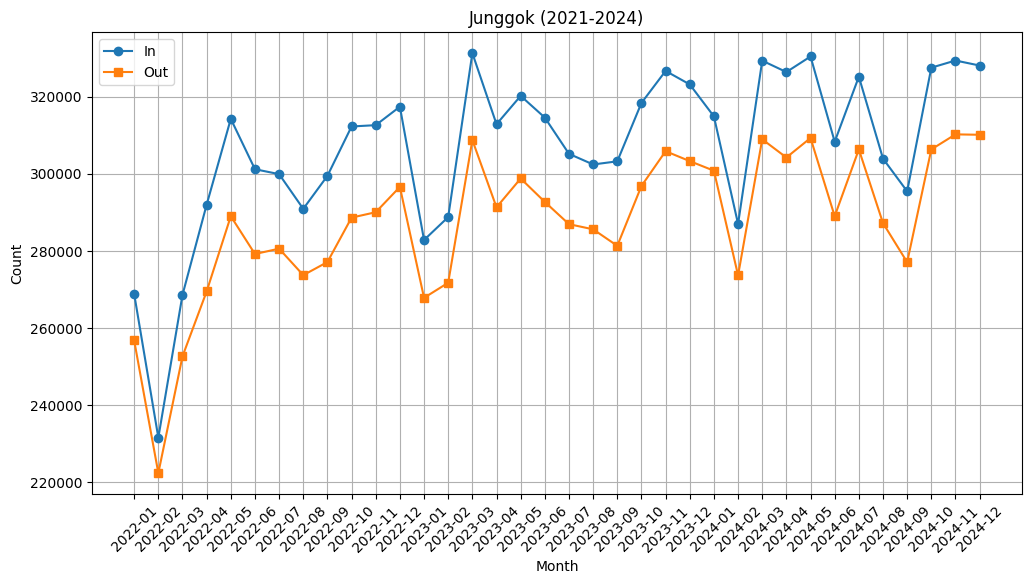

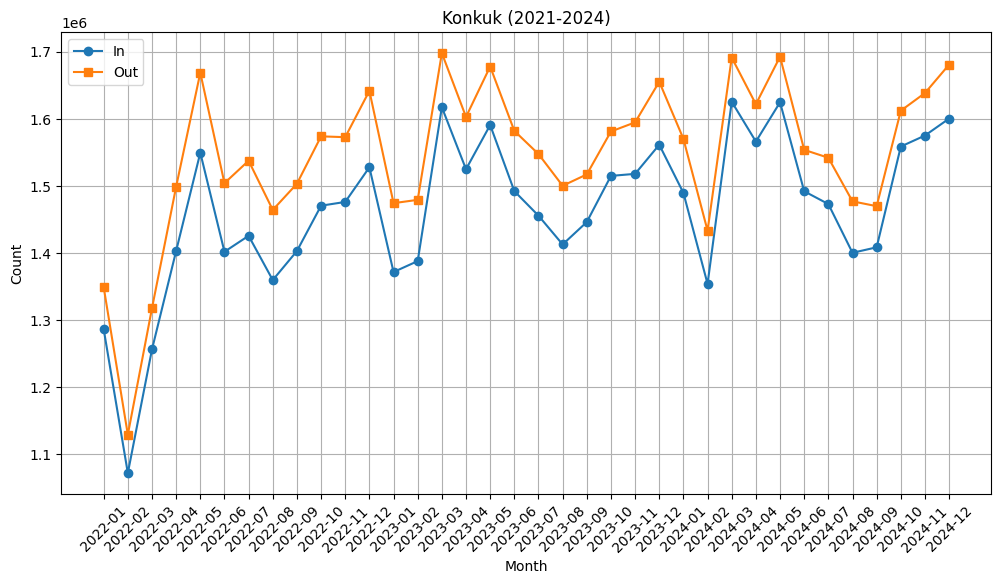

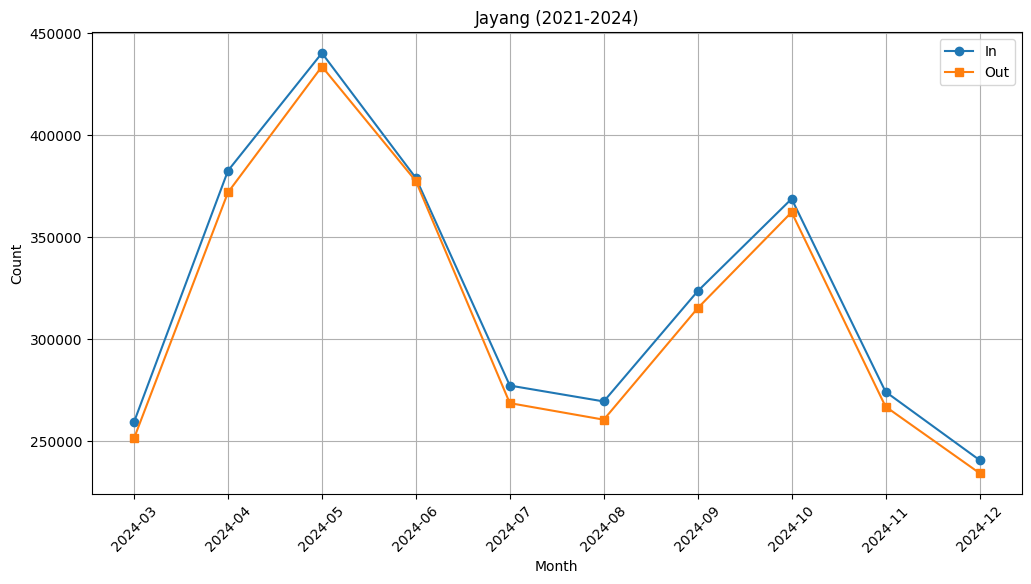

In [14]:
# 21년도부터 24년도의 데이터만 필터링
filtered_data = merged_df_cleaned[(merged_df_cleaned['사용일자'].dt.year >= 2022) & 
                                  (merged_df_cleaned['사용일자'].dt.year <= 2024)]

# 월별 데이터를 계산
filtered_data['월'] = filtered_data['사용일자'].dt.to_period('M')
monthly_data = filtered_data.groupby(['월', '역명'])[['승차총승객수', '하차총승객수']].sum().reset_index()

# 월별 승하차 데이터 그래프 그리기
all_stations = monthly_data['역명'].unique()

for station in all_stations:
    station_monthly_data = monthly_data[monthly_data['역명'] == station]
    
    plt.figure(figsize=(12, 6))
    plt.plot(station_monthly_data['월'].astype(str), station_monthly_data['승차총승객수'], label='In', marker='o')
    plt.plot(station_monthly_data['월'].astype(str), station_monthly_data['하차총승객수'], label='Out', marker='s')
    
    plt.title(f"{station} (2021-2024)")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
